# Assignment 3

## André Dias (59452); Tiago Rodrigues (49593)

# Problem 2

## Implement a Weighted Average Ensemble System in Python.

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import softmax
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [2]:
# Import data
data = load_breast_cancer()
X = data.data
y = data.target

For the proposed problem, it is necessary to validate the individual models of the desired ensemble in order to calculate the weights of each model and lastly validate the ensemble. As such, two data splitting procedures are required: one split of the initial data into a test set and an initial training set and another split of this initial training set into another training set and a validation set.

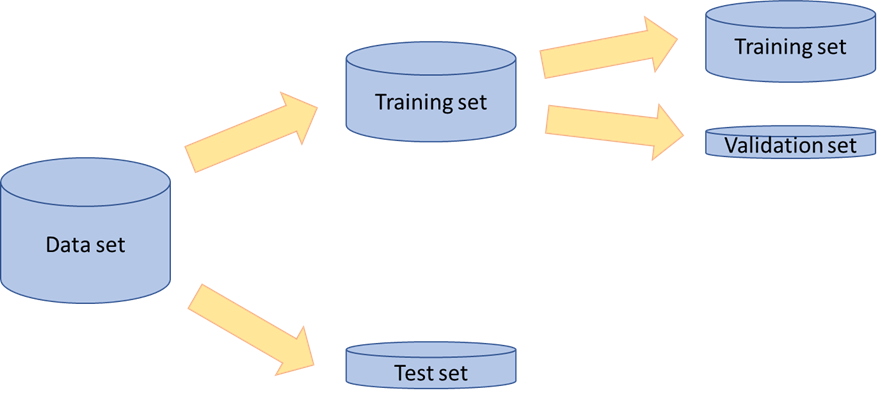

After splitting the data, it is necessary to keep in mind that most models benefit from independent variable scaling. As such, a scaler must be fit to the second training set and this scaler should then be used to scale all the sets of independent variables to be used (training, validation and test sets).

In [3]:
# Split data into train and test (independent validation) sets
X_train_IVS, X_test_IVS, y_train_IVS, y_test_IVS = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Split train data into train and validation sets
X_train, X_test, y_train, y_test = train_test_split(X_train_IVS, y_train_IVS, test_size = 0.25, random_state = 42)

# Perform data scaling
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_IVS_scaled = scaler.transform(X_train_IVS)
X_test_IVS_scaled = scaler.transform(X_test_IVS)

The main objective of this exercise is to implement a Weighted Average Ensemble System:

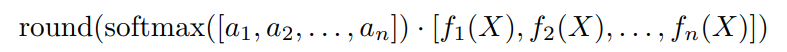

In order to explain how this can be implemented, a step by step will be provided:

As previously seen, the first data split is into a train and test sets. In the second split, this first training set is subdivided into another training set and a validation set. 

The second training set is used in an initial stage to train the individual models of the ensemble, while the validation set is used to validate them. Based on the accuracy of the models, obtained in this validation step, a weights matrix is calculated using the softmax function. In this function, the exponential of the accuracy of each model will be divided by the sum of the exponential of the accuracy of all the models:

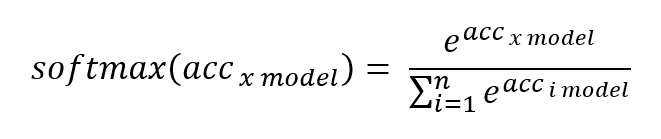

After obtaining these weights, which will be proportional to each model's accuracy, the individual models are then trained on the initial training set (before the second split). Each model will then be used to predict the output of the test set leading to the creation of a predictions matrix.

To obtain the ensemble predictions, it's necessary to calculate the dot product of the weights and predictions matrixes, which will calculate the final outputs based on the predictions of each model and the respective model's weight. Lastly, in order to obtain a binary classification, a round() must be used, since the ensemble predictions are not in binary form. In the end, the accuracy of the ensemble can be calculated by comparing its predictions with the true values of the test set.

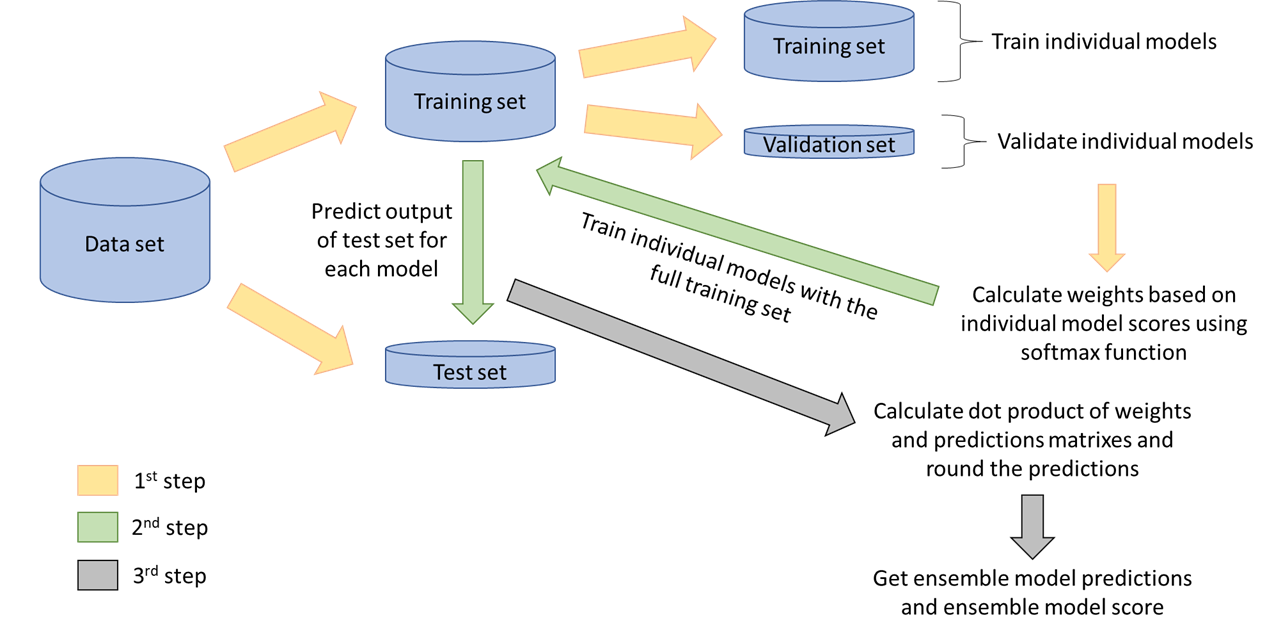

With this, the Weighted Average Ensemble System is implemented. It's name lies in the fact that each model weight is proportional to its accuracy, with higher scoring models contributing more to the ensemble.

In [4]:
def ensemblefunction(models, show_accuracies = False, show_weights = False):
    accuracies = []
    
    # Fit model on the second train set, obtain its predictions on the validation set and compute accuracy
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)
        if show_accuracies == True:
            print(model, "accuracy:", acc)
    
    # Calculate weights based on model accuracy using the softmax function
    weights = softmax(np.array(accuracies))
    if show_weights == True:
        print("Weights:", weights)
    
    # Fit model on the initial train set (second train set + validation set), obtain its predictions on the test set and compute accuracy
    preds = []
    for model in models:
        model.fit(X_train_IVS, y_train_IVS)
        y_pred = model.predict(X_test_IVS)
        preds.append(np.array(y_pred))
    
    # Calculate dot product of the weights and predictions matrix
    weighted_pred = np.dot(weights, preds)
    
    # Round the final predictions to obtain binary classification
    final_preds = np.round(weighted_pred)
    
    # Compute final accuracy score of the ensemble
    final_acc = accuracy_score(y_test_IVS, final_preds)
    return final_acc, accuracies

After creating the Weighted Average Ensemble System function, this methodology was applied on two decision tree classifiers, one using the Gini impurity criterion (the default criterion used by DecisionTreeClassifier) and the other using the entropy criterion (criterion='entropy').

In [5]:
# Suggested ensemble -> Decision Trees, one with gini and another with entropy criterion:
ensemble_acc, individual_acc = ensemblefunction([DecisionTreeClassifier(random_state = 42), DecisionTreeClassifier(criterion = 'entropy', random_state = 42)], True, True)
print('The accuracy of the ensemble model is:', ensemble_acc)

DecisionTreeClassifier(random_state=42) accuracy: 0.9439252336448598
DecisionTreeClassifier(criterion='entropy', random_state=42) accuracy: 0.9252336448598131
Weights: [0.50467276 0.49532724]
The accuracy of the ensemble model is: 0.951048951048951


Two main conclusion can be seen from the outputs presented:

1) It's possible to see, based on the individual models' accuracy and their weights, that the model with higher accuracy (the one using gini) had a higher weight and contributed more to the final output of the ensemble.

2) The results show that the ensemble model achieved an accuracy of 0.951, which is higher than the individual accuracies of both models. This means that an essemble of multiple decision trees is more powerful than a single tree. This was expected as RandomForestClassifier exists, which is an ensemble of several decision trees and is an extremely powerful and popular classification model.

Following this, the same idea was applied to the SVM model where one used the default hyperparameters (rbf kernel) and another used the poly kernel.

In [6]:
# Suggested ensemble -> SVMs, one with polynomial and other with RBF kernel:
ensemble_acc, individual_acc = ensemblefunction([SVC(), SVC(kernel = "poly")], True, True)
print('The accuracy of the ensemble model is:', ensemble_acc)

SVC() accuracy: 0.8878504672897196
SVC(kernel='poly') accuracy: 0.8785046728971962
Weights: [0.50233643 0.49766357]
The accuracy of the ensemble model is: 0.951048951048951


Based on the results, we can see that the ensemble model has an accuracy of 0.951, which is higher than the individual accuracies of both the RBF and polynomial SVMs. This suggests that combining the predictions of these two models using the ensemble method improves the overall accuracy of the classification, just like what happened to the decision trees.

After performing the tasks suggested in the exercise, further exploration of ensemble models was performed. Unlike the previous ensembles, where similar classifiers were used, only diverging in hyperparameters, this time different classifiers were tested:

SVC() accuracy: 0.8878504672897196
DecisionTreeClassifier(random_state=42) accuracy: 0.9439252336448598
LogisticRegression(max_iter=10000, random_state=42) accuracy: 0.9532710280373832
Weights: [0.31997085 0.33842573 0.34160342]
The accuracy of the ensemble model is: 0.972027972027972


Text(0, 0.5, 'Accuracy')

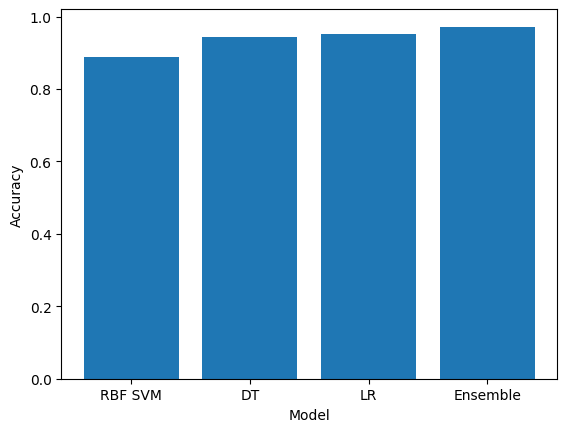

In [7]:
# Test mixture of models
ensemble_acc, individual_acc = ensemblefunction([SVC(), DecisionTreeClassifier(random_state = 42), LogisticRegression(max_iter = 10000, random_state = 42)], True, True)
print('The accuracy of the ensemble model is:', ensemble_acc)
plot_y = individual_acc.copy()
plot_y.append(ensemble_acc)
plt.figure()
plt.bar(['RBF SVM', 'DT', 'LR', 'Ensemble'], plot_y)
plt.xlabel('Model')
plt.ylabel('Accuracy')

Once again, the same conclusions were seen. The ensemble model is able to obtain a better accuracy when compared to individual models. Furthermore, this essemble of 3 distinct classification models led to an even better ensemble accuracy, which could be due to either the fact that 3 models were used instead of 2, but most likely due to the fact that the Logistic Regresssion model had a really good accuracy of 0.953.

Instead of testing only 2 or 3 models in an ensemble, the next step was trying a greater number of models. As such, a mix 7 classifiers was tested:

SVC(kernel='poly') accuracy: 0.8785046728971962
LogisticRegression(max_iter=10000) accuracy: 0.9532710280373832
KNeighborsClassifier() accuracy: 0.8878504672897196
DecisionTreeClassifier() accuracy: 0.9439252336448598
GaussianNB() accuracy: 0.9345794392523364
DecisionTreeClassifier(max_depth=10) accuracy: 0.9158878504672897
KNeighborsClassifier(algorithm='kd_tree') accuracy: 0.8878504672897196
Weights: [0.13774509 0.14843856 0.13903846 0.14705775 0.14568978 0.1429919
 0.13903846]
The accuracy of the ensemble model is: 0.972027972027972


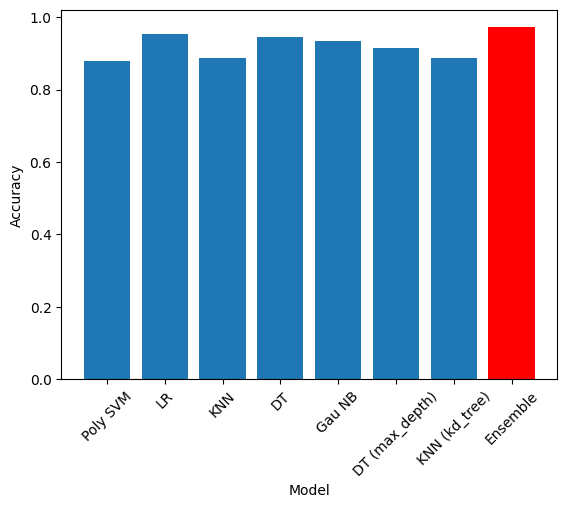

In [8]:
# Test with 7 models

model_1 = SVC(kernel = "poly")
model_2 = LogisticRegression(max_iter = 10000)
model_3 = KNeighborsClassifier()
model_4 = DecisionTreeClassifier()
model_5 = GaussianNB()
model_6 = DecisionTreeClassifier(max_depth = 10)
model_7 = KNeighborsClassifier(algorithm = 'kd_tree')
models = [model_1, model_2, model_3, model_4, model_5, model_6, model_7]

ensemble_acc, individual_acc = ensemblefunction(models, True, True)
print('The accuracy of the ensemble model is:', ensemble_acc)

# Plot individual accuracies
plt.figure()
plt.bar(['Poly SVM', 'LR', 'KNN', 'DT', 'Gau NB', 'DT (max_depth)', 'KNN (kd_tree)'], individual_acc)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation = 45)  # Rotate the x-axis labels by 45 degrees

# Plot ensemble accuracy
plt.bar('Ensemble', ensemble_acc, color='red')
plt.show()

Based on the results, it seems that logistic regression is the best performing individual model, followed by Gaussian Naive Bayes. The ensemble approach improved the accuracy even further, achieving an accuracy of 0.972. The weights assigned to each model suggest that logistic regression and Gaussian Naive Bayes are the most important models in the ensemble, with the highest weights. The other models contribute less to the overall accuracy.

Despite this, one interesting conclusion is that comparing this ensemble of 7 models to the last one with only 3, the same accuracy was obtained. Does the accuracy of the ensemble model reach a plateou after a certain number of models? To test this, ensemble models containing from 2 to 100 trees were tested:

Text(0, 0.5, 'Ensemble Accuracy')

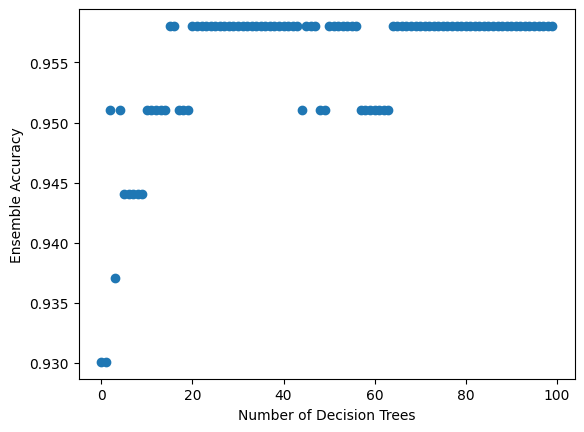

In [9]:
# Test the effect of many decision trees with different random_states
accuracies = []
models = []
for i in range(100):
    models.append(DecisionTreeClassifier(random_state = i))
for i in range(-len(models)+1, 0, 1):
    used_models = models[:i]
    #print('\nFor ensemble =', used_models)
    ensemble_acc, individual_acc = ensemblefunction(used_models)
    accuracies.append(ensemble_acc)
#print('\nFor ensemble =', models)
ensemble_acc, individual_acc = ensemblefunction(models)
accuracies.append(ensemble_acc)
plt.scatter(range(len(models)), accuracies)
plt.xlabel('Number of Decision Trees')
plt.ylabel('Ensemble Accuracy')

As seen from the obtained results, the ensemble model does in fact reach a plateau in accuracy after a certain number of models is utilized. When using decision trees, this plateau seems to be reached at around 20 trees, but for other models, or mix of models the plateau may come sooner or later. As such, the results obtained previously make sense.

The main conclusions that can be made from this exercise are:

1) The utilization of an ensemble of models generaly leads to better classification accuracy when compared to the utilization of a single model.

2) The increase in accuracy of an ensemble tends to reach a plateau after a certain number of models is utilized. This is particularly important, as an ensemble with a greater number of models generaly takes more time to train. As such, making an ensemble with a number of models higher then necessary could lead to increased model training time without accuracy benefits.

Another possibility that could be interesting to test with ensembles is models that require random initialization of weights, such as neural networks. An ensemble of such models may allow to combat bad weight initializations and help obtaining models that avoid local minimums.